<a href="https://colab.research.google.com/github/jdasam/mas1004/blob/2024/live_coding/4_MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST classification
- In this notebook we will use the MNIST dataset to train a neural network to classify handwritten digits.

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
# make plt grayscale as default
plt.rcParams['image.cmap'] = 'gray'

DEV = 'cuda' # Use GPU # library for NVIDIA GPU
assert torch.cuda.is_available(), "Make sure you run this Colab in GPU"

## 0. Download Dataset

In [2]:
train_data = dsets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = dsets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:07<00:00, 1.28MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 137kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.48MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
img, label = train_data[0]
print(img.shape), print(label)

torch.Size([1, 28, 28])
5


(None, None)

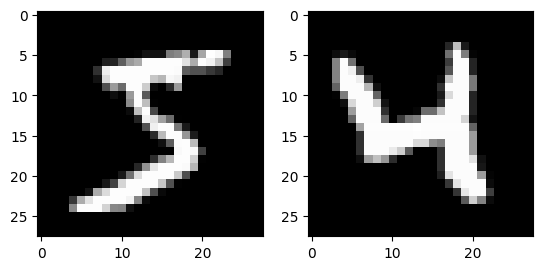

In [6]:
plt.subplot(1, 2, 1) # use 1 row, 2 column, and use 1st place
plt.imshow(img.squeeze())
plt.subplot(1,2,2)
plt.imshow(train_data[20][0].squeeze())

In [7]:
flattened_img = img.reshape(28 * 28)
flattened_img = img.reshape(-1)
flattened_img.shape

torch.Size([784])

In [44]:
# let's try to make a batch
# idx = 0

imgs = []
labels = []

for idx in range(10000):
  img, label = train_data[idx]
  # print(img.shape, label)
  imgs.append(img)
  labels.append(label)
print(labels)
# use torch.stack to convert list of tensors to a single tensor with new dimesion

stack_result = torch.stack(imgs, dim=0)
print(f"stack in dim0 shape: {stack_result.shape}")

cat_result = torch.cat(imgs, dim=1)
print(f"cat in dim1 shape: {cat_result.shape}")

imgs = torch.stack(imgs, dim=0)
labels = torch.tensor(labels)

print(f"imgs.shape = {imgs.shape}, labels.shape = {labels.shape}")
print(labels[:10])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1, 5, 7, 1, 7, 1, 1, 6, 3, 0, 2, 9, 3, 1, 1, 0, 4, 9, 2, 0, 0, 2, 0, 2, 7, 1, 8, 6, 4, 1, 6, 3, 4, 5, 9, 1, 3, 3, 8, 5, 4, 7, 7, 4, 2, 8, 5, 8, 6, 7, 3, 4, 6, 1, 9, 9, 6, 0, 3, 7, 2, 8, 2, 9, 4, 4, 6, 4, 9, 7, 0, 9, 2, 9, 5, 1, 5, 9, 1, 2, 3, 2, 3, 5, 9, 1, 7, 6, 2, 8, 2, 2, 5, 0, 7, 4, 9, 7, 8, 3, 2, 1, 1, 8, 3, 6, 1, 0, 3, 1, 0, 0, 1, 7, 2, 7, 3, 0, 4, 6, 5, 2, 6, 4, 7, 1, 8, 9, 9, 3, 0, 7, 1, 0, 2, 0, 3, 5, 4, 6, 5, 8, 6, 3, 7, 5, 8, 0, 9, 1, 0, 3, 1, 2, 2, 3, 3, 6, 4, 7, 5, 0, 6, 2, 7, 9, 8, 5, 9, 2, 1, 1, 4, 4, 5, 6, 4, 1, 2, 5, 3, 9, 3, 9, 0, 5, 9, 6, 5, 7, 4, 1, 3, 4, 0, 4, 8, 0, 4, 3, 6, 8, 7, 6, 0, 9, 7, 5, 7, 2, 1, 1, 6, 8, 9, 4, 1, 5, 2, 2, 9, 0, 3, 9, 6, 7, 2, 0, 3, 5, 4, 3, 6, 5, 

In [30]:
# flatten that img tensor so that each datasample has 784 numbers

# imgs.shape = [100, 1, 28, 28]
# -> [100, 784]: 100 samples, and each of sample is 784-dim vector

# using reshape
reshaped_imgs = imgs.reshape(100, 784)
reshaped_imgs = imgs.reshape(100, -1)
reshaped_imgs = imgs.reshape(50, -1) # what would be the shape of this?
print(imgs.numel(), reshaped_imgs.shape)
# reshape has to preserve number of elements in the tensor

reshaped_imgs = imgs.reshape(78400).reshape(100, -1) # Reshape is trying to flatten everything and arange tensor again

flattend_imgs = imgs.flatten(start_dim=1)
print(flattend_imgs.shape)



78400 torch.Size([50, 1568])
torch.Size([100, 784])


In [36]:
flattend_imgs.shape

torch.Size([100, 784])

In [39]:
import torch.nn as nn

layer1 = nn.Linear(784, 64)
relu = nn.ReLU()
layer2 = nn.Linear(64,64)

x = flattend_imgs
# x = layer1(x)
# x = relu(x)
# x = layer2(x)

layers = nn.Sequential(
    nn.Linear(784, 64),
    nn.ReLU(),
    nn.Linear(64, 64),
    nn.ReLU(),
    nn.Linear(64, 10))

layers(x)

tensor([[ 0.0761,  0.0063, -0.0688, -0.0944, -0.0339,  0.0493,  0.0607,  0.0161,
         -0.0658, -0.0219],
        [ 0.0202, -0.0015, -0.0860, -0.1054, -0.0777,  0.0899,  0.0644, -0.0139,
         -0.0322, -0.0371],
        [ 0.0283, -0.0266, -0.1106, -0.1166, -0.0183,  0.0684,  0.0841, -0.0183,
         -0.0123, -0.0646],
        [ 0.0314,  0.0236, -0.0984, -0.0971, -0.0539,  0.0309,  0.0922, -0.0387,
         -0.0232, -0.0554],
        [ 0.0472,  0.0292, -0.1092, -0.0834, -0.0354,  0.0267,  0.1041,  0.0069,
         -0.0662, -0.0407],
        [ 0.0302,  0.0247, -0.1065, -0.0724, -0.0399,  0.0629,  0.0746, -0.0106,
         -0.0506, -0.0565],
        [ 0.0495,  0.0342, -0.1089, -0.1060, -0.0255,  0.0185,  0.0734, -0.0175,
         -0.0493, -0.0554],
        [ 0.0696,  0.0181, -0.0644, -0.1027, -0.0469,  0.0250,  0.0610,  0.0065,
         -0.0379, -0.0478],
        [ 0.0600,  0.0231, -0.1043, -0.0979, -0.0251,  0.0379,  0.0799, -0.0228,
         -0.0565, -0.0534],
        [ 0.0522,  

In [46]:
# Let's compare batch computation and for loop computation

import time
device = 'cuda' # gpu driver
layers = layers.to(device) # move layer parameters to gpu
flattend_imgs = flattend_imgs.to(device)  # move data tensor to gpu

start_time = time.time()
layers(flattend_imgs)
end_time = time.time()
print(f"Batch computation: {end_time - start_time}")

start_time = time.time()
for sample in flattend_imgs:
  layers(sample)
end_time = time.time()
print(f"Sample for-loop computation: {end_time - start_time}")


Batch computation: 0.0007987022399902344
Sample for-loop computation: 0.01625680923461914


#### Extra: Practice on Reshape

In [ ]:
# what is difference between reshape(1000, 784) and reshape(784, 1000)
test = torch.arange(784).repeat(1000, 1)
test, test.shape

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 torch.Size([1000, 784]))

In [ ]:
test_flattened = test.reshape(-1) # 784000 dim vector
test_flattened.shape

torch.Size([784000])

In [ ]:
reshaped_a = test_flattened.reshape(1000, 784)
reshaped_b = test_flattened.reshape(784, 1000)
reshaped_a, reshaped_b

(tensor([[  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         ...,
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783],
         [  0,   1,   2,  ..., 781, 782, 783]]),
 tensor([[  0,   1,   2,  ..., 213, 214, 215],
         [216, 217, 218,  ..., 429, 430, 431],
         [432, 433, 434,  ..., 645, 646, 647],
         ...,
         [136, 137, 138,  ..., 349, 350, 351],
         [352, 353, 354,  ..., 565, 566, 567],
         [568, 569, 570,  ..., 781, 782, 783]]))

In [ ]:
dummy = torch.arange(12)
print(dummy)
print(dummy.reshape(3,4))
print(dummy.reshape(4,3))

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


In [ ]:
# label_tensor = torch.tensor(label_list)
# flattened_data.shape, label_tensor.shape

NameError: ignored

In [ ]:
# first_data = flattened_data[1]
# plt.imshow(first_data.reshape(28, 28))

In [ ]:
# first_data.shape, first_data

# 0.0 Using DataLoader

In [19]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [20]:
class Dataset:
  def __init__(self, data):
    self.data = data

  # To implement the dataset, you have to declare two methods
  # __getitem__ and __len__

  def __getitem__(self, idx):
    # this method is called when you do train_set[idx]
    # here, we want to return our idx-th datasample, in proper format
    img, label = self.data[idx]
    # return img, label
    return img.reshape(-1), label

  def __len__(self):
    # how many datasample we have in our dataset?
    # what is the maximum valid idx for __getitem__
    return len(self.data)

train_set = Dataset(train_data)
# train_set[15]
len(train_set)

60000

In [21]:
train_set[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [24]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)

for batch in train_loader:
  imgs, labels = batch
  break
imgs.shape


torch.Size([16, 784])

## 1. Make a Model

In [25]:
class Classifier(nn.Module):
  def __init__(self, input_dim=784, num_class=10):
    super().__init__()
    # Let's make three layer models

    # What we know: input_dim = 784
    # number_of_categories = 10
    hidden_dim = 64
    hidden_dim2= 32

    self.layer1 = nn.Linear(in_features=input_dim, out_features=hidden_dim)
    self.layer2 = nn.Linear(in_features=hidden_dim, out_features=hidden_dim2)
    self.layer3 = nn.Linear(in_features=hidden_dim2, out_features=num_class)

  def forward(self, x):
    x = self.layer1(x)
    x = x.relu()
    x = self.layer2(x)
    x = x.relu()
    logit = self.layer3(x)
    prob = logit.softmax(dim=-1)
    return prob, logit

model = Classifier()

torch.set_printoptions(sci_mode=False)
pred, logit = model(imgs)
pred.shape, pred[:10]

(torch.Size([16, 10]),
 tensor([[0.1030, 0.0987, 0.1143, 0.1168, 0.0911, 0.1122, 0.0994, 0.0814, 0.0871,
          0.0960],
         [0.1029, 0.0997, 0.1080, 0.1160, 0.0900, 0.1151, 0.0959, 0.0810, 0.0858,
          0.1056],
         [0.1017, 0.0978, 0.1149, 0.1135, 0.0895, 0.1111, 0.1021, 0.0812, 0.0898,
          0.0985],
         [0.1044, 0.0998, 0.1150, 0.1200, 0.0942, 0.1115, 0.0932, 0.0820, 0.0870,
          0.0930],
         [0.1000, 0.1000, 0.1164, 0.1162, 0.0917, 0.1085, 0.1004, 0.0822, 0.0856,
          0.0990],
         [0.1000, 0.0973, 0.1120, 0.1133, 0.0923, 0.1139, 0.1018, 0.0827, 0.0877,
          0.0989],
         [0.1001, 0.0968, 0.1142, 0.1199, 0.0908, 0.1109, 0.1001, 0.0820, 0.0865,
          0.0988],
         [0.1024, 0.1012, 0.1128, 0.1134, 0.0916, 0.1102, 0.0961, 0.0839, 0.0910,
          0.0975],
         [0.0993, 0.0978, 0.1129, 0.1177, 0.0932, 0.1122, 0.1008, 0.0825, 0.0834,
          0.1002],
         [0.1034, 0.0977, 0.1129, 0.1162, 0.0891, 0.1122, 0.1007, 0.

In [30]:
exp_logit = torch.exp(logit)
sum_exp_logit = exp_logit.sum(dim=1)
sum_exp_logit, sum_exp_logit.shape
sum_exp_logit = sum_exp_logit.reshape(-1, 1)
prob = exp_logit / sum_exp_logit
prob

tensor([[0.1030, 0.0987, 0.1143, 0.1168, 0.0911, 0.1122, 0.0994, 0.0814, 0.0871,
         0.0960],
        [0.1029, 0.0997, 0.1080, 0.1160, 0.0900, 0.1151, 0.0959, 0.0810, 0.0858,
         0.1056],
        [0.1017, 0.0978, 0.1149, 0.1135, 0.0895, 0.1111, 0.1021, 0.0812, 0.0898,
         0.0985],
        [0.1044, 0.0998, 0.1150, 0.1200, 0.0942, 0.1115, 0.0932, 0.0820, 0.0870,
         0.0930],
        [0.1000, 0.1000, 0.1164, 0.1162, 0.0917, 0.1085, 0.1004, 0.0822, 0.0856,
         0.0990],
        [0.1000, 0.0973, 0.1120, 0.1133, 0.0923, 0.1139, 0.1018, 0.0827, 0.0877,
         0.0989],
        [0.1001, 0.0968, 0.1142, 0.1199, 0.0908, 0.1109, 0.1001, 0.0820, 0.0865,
         0.0988],
        [0.1024, 0.1012, 0.1128, 0.1134, 0.0916, 0.1102, 0.0961, 0.0839, 0.0910,
         0.0975],
        [0.0993, 0.0978, 0.1129, 0.1177, 0.0932, 0.1122, 0.1008, 0.0825, 0.0834,
         0.1002],
        [0.1034, 0.0977, 0.1129, 0.1162, 0.0891, 0.1122, 0.1007, 0.0796, 0.0887,
         0.0996],
        [0

In [ ]:
print(logit[0], pred[0])
edited_logit1 = logit[0].clone()
edited_logit1[0] = 5.0
print(edited_logit1)
print(edited_logit1.softmax(dim=-1))
edited_logit2 = logit[0].clone()
edited_logit2[1:] = -5
print(edited_logit2)
print(edited_logit2.softmax(dim=-1))


tensor([-0.1781, -0.1639,  0.2204,  0.0454, -0.0955, -0.1440, -0.1863, -0.1799,
        -0.0735,  0.2191], grad_fn=<SelectBackward0>) tensor([0.0872, 0.0885, 0.1299, 0.1091, 0.0947, 0.0903, 0.0865, 0.0871, 0.0969,
        0.1298], grad_fn=<SelectBackward0>)
tensor([ 5.0000, -0.1639,  0.2204,  0.0454, -0.0955, -0.1440, -0.1863, -0.1799,
        -0.0735,  0.2191], grad_fn=<CopySlices>)
tensor([0.9443, 0.0054, 0.0079, 0.0067, 0.0058, 0.0055, 0.0053, 0.0053, 0.0059,
        0.0079], grad_fn=<SoftmaxBackward0>)
tensor([-0.1781, -5.0000, -5.0000, -5.0000, -5.0000, -5.0000, -5.0000, -5.0000,
        -5.0000, -5.0000], grad_fn=<CopySlices>)
tensor([0.9324, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075, 0.0075,
        0.0075], grad_fn=<SoftmaxBackward0>)


In [ ]:
# We want to convert the output into a range of probability
# Why we use softmax function

## 1.1 Make Softmax

In [ ]:
torch.set_printoptions(sci_mode=False)
def my_softmax(x, dim=0):
  exp_x = torch.exp(x)
  return exp_x / torch.sum(exp_x, dim=1, keepdim=True)
my_softmax(pred, dim=1)

In [ ]:
pred.softmax(dim=1)

In [ ]:
test = pred[:3]
print(test)
print(torch.exp(test))
print(torch.exp(test).sum(dim=1, keepdim=True))

## 2. Training

### 2.1 Make a Loss Function
- Define Negative Log Likelihood Loss
  - $L = -\sum_{i=1}^n\log(\hat{y}_{i}^{(c)})$
  - $y_{i}^{(c)} \in (0, 1)$: predicted probability for $i$-th sample to be class $c$, where $c$ is the ground truth label for $i$-th sample
- Define Cross Entropy Loss
  - $L = -\sum_{i=1}^ny_{i}\log(\hat{y}_{i})$
  - $ y_{i} \in (0,1)^C$: ground truth label for $i$-th sample to be class $c$. $C$ denotes the number of classes.
    - One-hot encoding: $y_{i} = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]$
  - $ \hat{y}_{i} \in (0, 1)^C$: predicted probability for $i$-th sample to be class $c$
    - e.g.: $\hat{y}_{i} = [0.1, 0.1, 0.5, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.1]$

In [ ]:
def get_negative_log_likelihood(pred, target, eps=1e-8):
  predicted_probs = []
  # for i in range(len(pred)): #len(pred) means number of samples, or pred.shape[0]
  #   i_th_pred = pred[i]
  #   correct_label = target[i]
  #   predicted_prob_for_correct_class = i_th_pred[correct_label]
  #   # print(i_th_pred, correct_label, predicted_prob_for_correct_class)
  #   predicted_probs.append(predicted_prob_for_correct_class)

  # predicted_probs = torch.tensor(predicted_probs)
  predicted_probs = pred[torch.arange(len(target)), target]
  return -torch.log(predicted_probs + eps).mean()

def get_cross_entropy(pred, target, eps=1e-8):
  return

def make_one_hot_vector(target, num_class=10):
  return

# pred.shape, label_tensor.shape
# print(pred[:5])
# print(label_tensor[:5])

# predicted_probs = []
# for i in range(len(pred)): #len(pred) means number of samples, or pred.shape[0]
#   i_th_pred = pred[i]
#   correct_label = label_tensor[i]
#   predicted_prob_for_correct_class = i_th_pred[correct_label]
#   # print(i_th_pred, correct_label, predicted_prob_for_correct_class)
#   predicted_probs.append(predicted_prob_for_correct_class)

# predicted_probs = torch.tensor(predicted_probs)

loss = get_negative_log_likelihood(pred, label_tensor)
loss

NameError: ignored

In [ ]:
# you can index tensor by list of indices
# [(0, target[0]), (1, target[1]), (2, target[2])]
# for i, c in zip(torch.arange(len(label_tensor)), label_tensor):
#   print(i,c)

pred[torch.arange(len(label_tensor)), label_tensor]

In [ ]:
-torch.log(predicted_probs).mean()

tensor(2.3195)

### 2.2 Define Training Loop

In [ ]:
def train_one_step(model, optimizer, loss_function, input, target):
  pred, logit = model(input) # forward pass. compute the prediction
  loss = loss_function(pred, target) # compute the loss
  loss.backward() # backpropagate theloss. compute the gradient
  optimizer.step() # update the parameters based on each gradient
  optimizer.zero_grad() # clear the gradient for every parameters
  return loss.item() # return the loss value


### 2.3 Make Batch

In [ ]:
def get_batch(input_tensor, label_tensor, batch_size, start_idx):
  # slice input tensor from start_idx:start_idx + batch_size

  return input_tensor[start_idx:start_idx+batch_size], label_tensor[start_idx:start_idx+batch_size]

batch_size = 64
start_idx = 10
batch_input, batch_label = get_batch(data_tensor, label_tensor, batch_size, start_idx)
(batch_input[0] == data_tensor[10]).all()

tensor(True)

### 2.4 Train

In [ ]:
DEV

'cuda'

In [ ]:
!pip install tqdm

In [ ]:
import time
from tqdm.auto import tqdm

model = Classifier()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=1000, shuffle=True)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_function = get_negative_log_likelihood

losses = []
num_epochs = 5

model.to(DEV) # move model to cuda. Move model's parameter on GPU's VRAM

for epoch in tqdm(range(num_epochs)):
  for batch in tqdm(train_loader, leave=False):
    input_batch, target_batch = batch
    input_batch = input_batch.to(DEV)  # Movetensor to GPU's VRAM
    target_batch = target_batch.to(DEV)
    loss = train_one_step(model, optimizer, loss_function, input_batch, target_batch)
    losses.append(loss)




  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

In [ ]:
# batch_size = 10000
# num_batch_per_epoch = len(data_tensor) // batch_size # TODO
# # num_batch_per_epoch

# for epoch in range(num_epochs):
#   # rand_idx = torch.randperm(len(data_tensor))
#   # data_tensor = data_tensor[rand_idx]
#   # label_tensor = label_tensor[rand_idx]
#   start_time = time.time()
#   for batch_idx in range(num_batch_per_epoch):
#     batch_start_idx = batch_idx * batch_size
#     input_batch, target_batch = get_batch(data_tensor, label_tensor, batch_size, batch_start_idx)
#     loss = train_one_step(model, optimizer, loss_function, input_batch, target_batch)
#     losses.append(loss)
#   end_time = time.time()
#   print(end_time - start_time)

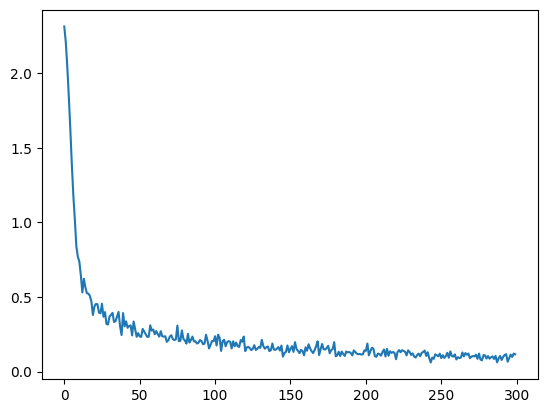

In [ ]:
plt.plot(losses)

In [ ]:
test_loader = torch.utils.data.DataLoader(Dataset(test_data), batch_size=1000, shuffle=False)

test_batch = next(iter(test_loader))
# this will make something like "batch in test_loader" (iterator)
# and only gets the first one
imgs, labels = test_batch
# imgs.shape

pred, logit = model(imgs.to(DEV))
pred.shape

torch.Size([1000, 10])

In [ ]:
pred[0:3]

tensor([[    0.0000,     0.0000,     0.0003,     0.0000,     0.0000,     0.0000,
             0.0000,     0.9996,     0.0000,     0.0001],
        [    0.0000,     0.0005,     0.9995,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000],
        [    0.0000,     0.9975,     0.0001,     0.0000,     0.0009,     0.0000,
             0.0000,     0.0013,     0.0001,     0.0001]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [ ]:
# torch.argmax
# return the indices that has maximum value
predicted_labels = torch.argmax(pred, dim=1).cpu()
predicted_labels[:10]

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [ ]:
(predicted_labels == labels).sum().item() / len(labels)

0.965

In [ ]:
torch.where(predicted_labels != labels)
# it gives in which indices our model made wrong predictions

(tensor([104, 124, 151, 158, 241, 247, 259, 320, 321, 336, 340, 359, 381, 414,
         435, 445, 464, 495, 530, 578, 582, 583, 610, 659, 691, 707, 720, 810,
         844, 895, 938, 947, 951, 965, 992]),)

GT Label: 9, Predicted: 5


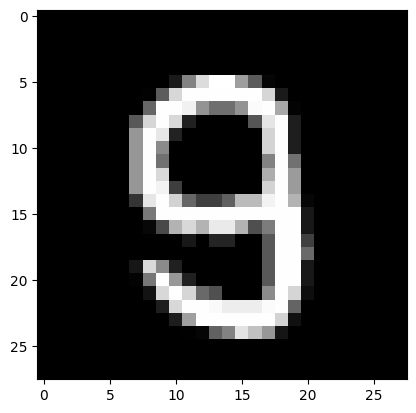

In [ ]:
idx = 241
img, label = test_data[idx]
predicted_lb = predicted_labels[idx].item()

print(f"GT Label: {label}, Predicted: {predicted_lb}")
plt.imshow(img.squeeze())